In [1]:
%matplotlib inline
import lightkurve as lk
from lightkurve_ext import download_lightcurvefiles, of_sector, of_sectors
import tic_plot as tplt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib

import pandas as pd
import astropy as astropy
from astropy.io import fits

In [2]:
# The first exoplanet identified by TESS, Pi Mensae c
# (the system already has a known exoplanet prior to the discovery of 'c')
# https://astronomical.fandom.com/wiki/Pi_Mensae_c
# https://en.wikipedia.org/wiki/Pi_Mensae
# https://exo.mast.stsci.edu/exomast_planet.html?planet=piMenc
# https://exofop.ipac.caltech.edu/tess/target.php?id=261136679
tic = 261136679 # piMenc or Pi Mensae c

# Load the light_curves into collection
lcf_coll = download_lightcurvefiles(f"TIC{tic}", mission='TESS', download_dir='./data')
print(len(lcf_coll))


6


In [3]:
# search_res = lk.search.search_lightcurvefile(f"TIC{tic}", mission='TESS')
# search_res.table
#
# entry = search_res.table[0]
# entry['obs_collection'] +  '/' + entry['obs_id'] + '/' + entry['productFilename']
# list(map(lambda e: e['obs_collection'] +  '/' + e['obs_id'] + '/' + e['productFilename']
#          , search_res.table))


In [4]:
if False: 
    fig = plt.figure(figsize=(30,15))
    tplt.plot_lcf_flux_delta(of_sector(lcf_coll, 15), fig.gca()
                     , xmin=1734.5, xmax=1735.5
                       )


Sectors: [1, 4, 8, 11, 12, 13]


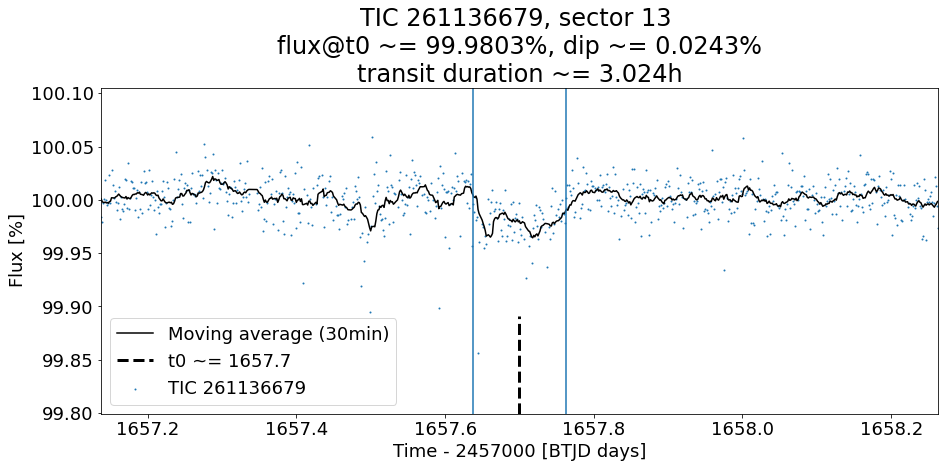

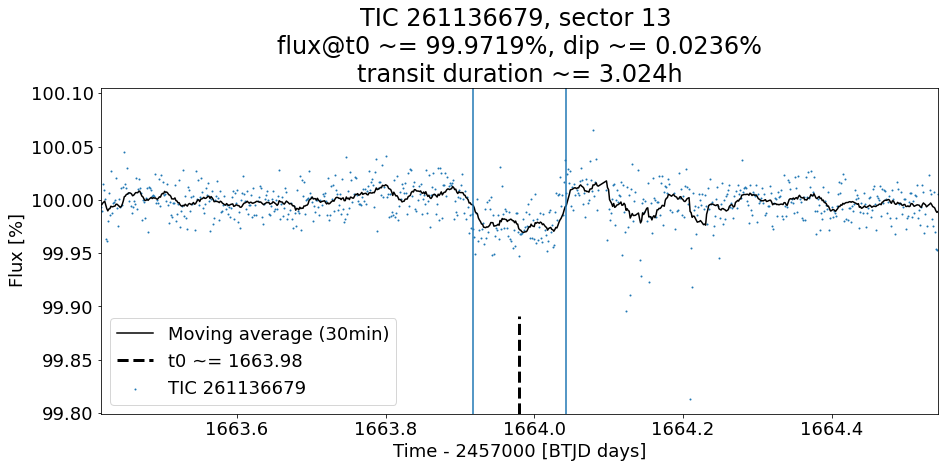

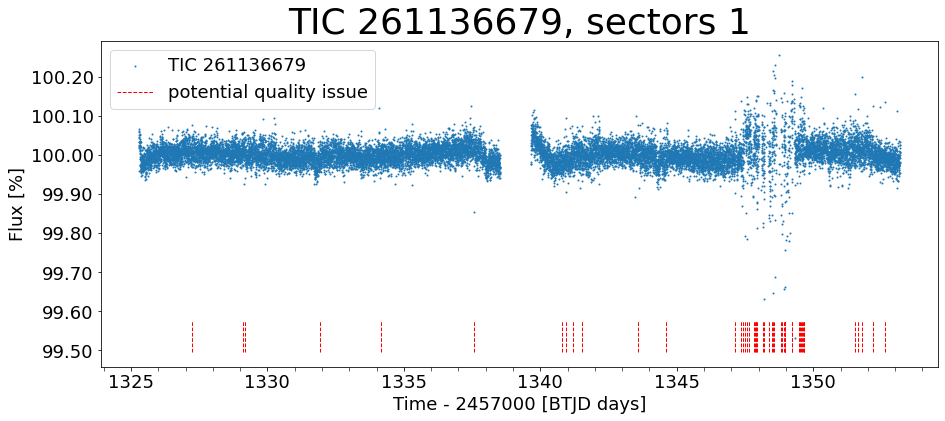

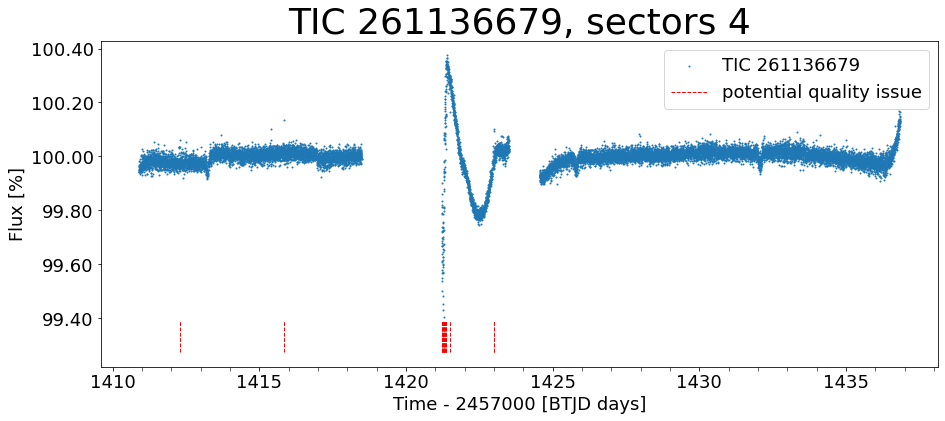

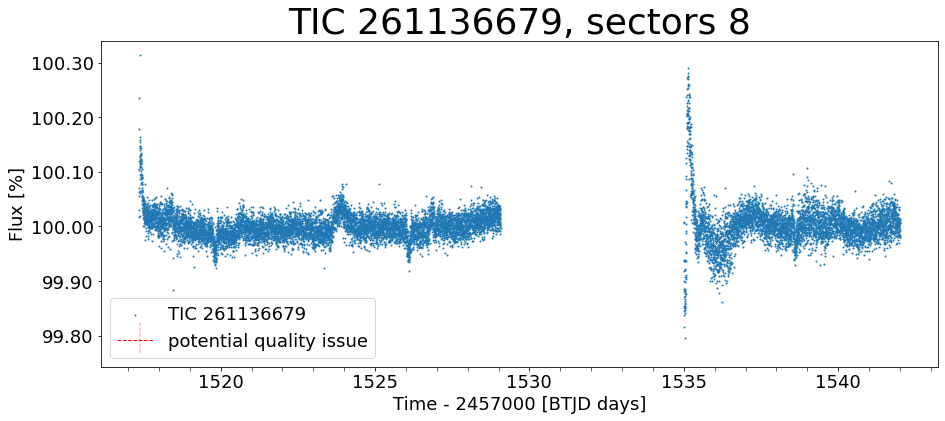

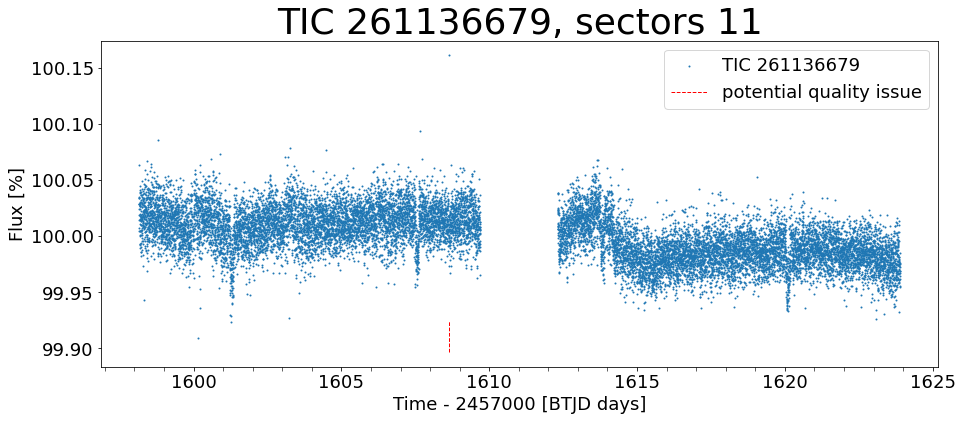

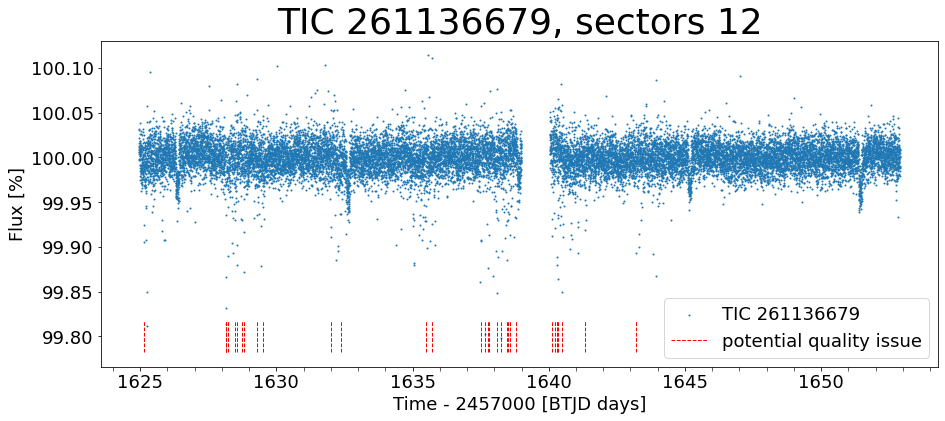

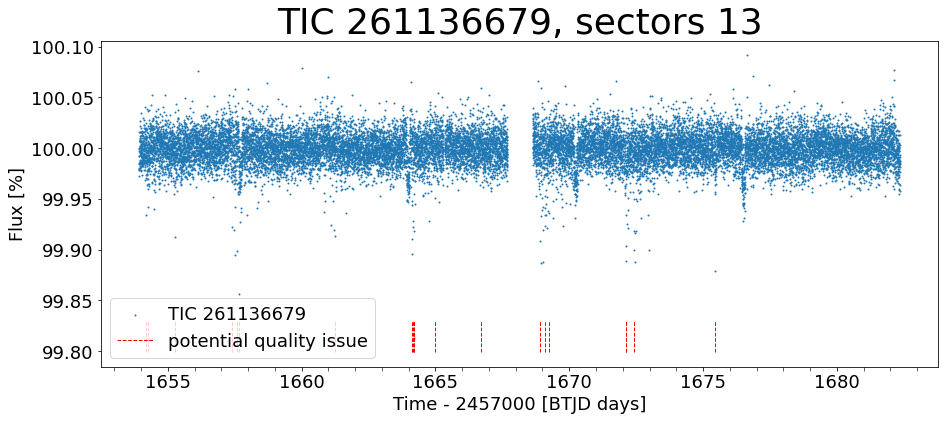

In [5]:
def plot_selected(lcf_coll):                      
    matplotlib.rcParams.update({'font.size':18}) 
    matplotlib.rcParams.update({'font.family':'sans-serif'})
#     tplt.plot_n_annotate_lcf(of_sector(lcf_coll, 14), ax=tplt.lcf_fig().gca()
#                         , t0=1704.58, t_start=1704.51, t_end=1704.65
#                        )
    tplt.plot_n_annotate_lcf(of_sector(lcf_coll, 13), ax=tplt.lcf_fig().gca()                             
                        , t0=1657.70, t_start=1657.637, t_end=1657.763
                       )
    tplt.plot_n_annotate_lcf(of_sector(lcf_coll, 13), ax=tplt.lcf_fig().gca()                             
                        , t0=1663.98, t_start=1663.917, t_end=1664.043
                       )
#     print(f"Period ~= {as_4decimal(1622.5 - 1538.6)} days")
    return

plot_selected(lcf_coll)
                     
tplt.plot_all(lcf_coll)



print("Sectors: " + str(list(map(lambda lcf: lcf.get_header()['SECTOR'], lcf_coll))))


Centroids


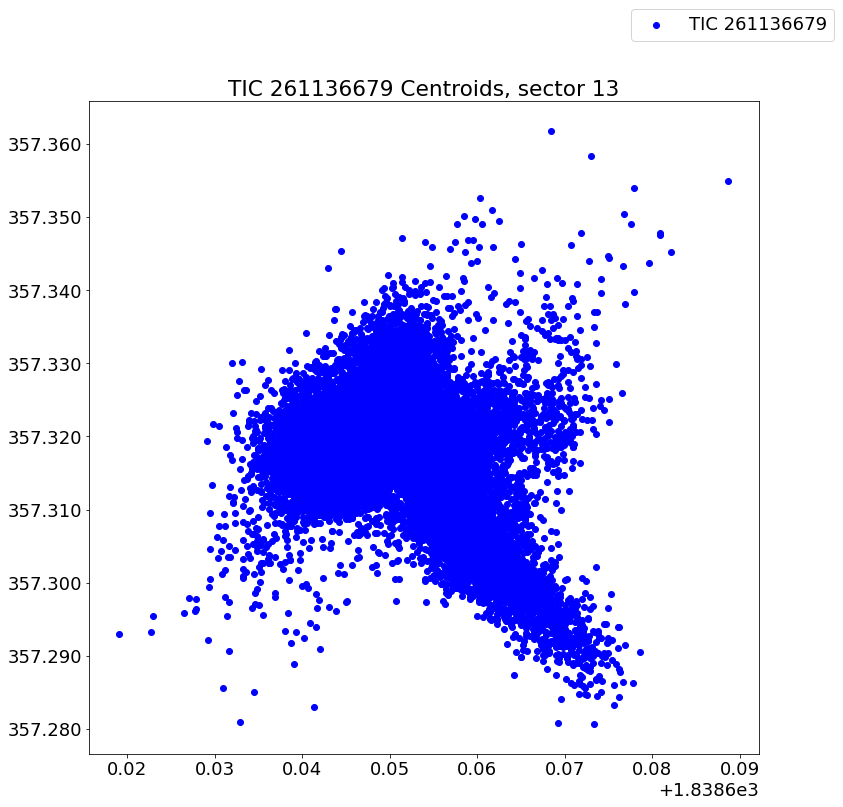

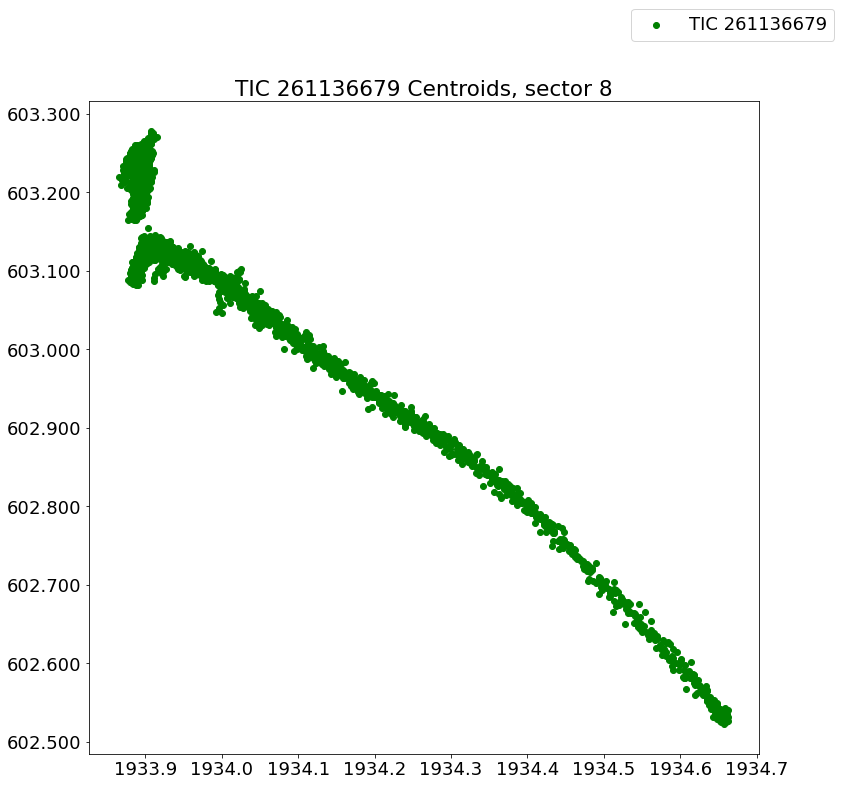

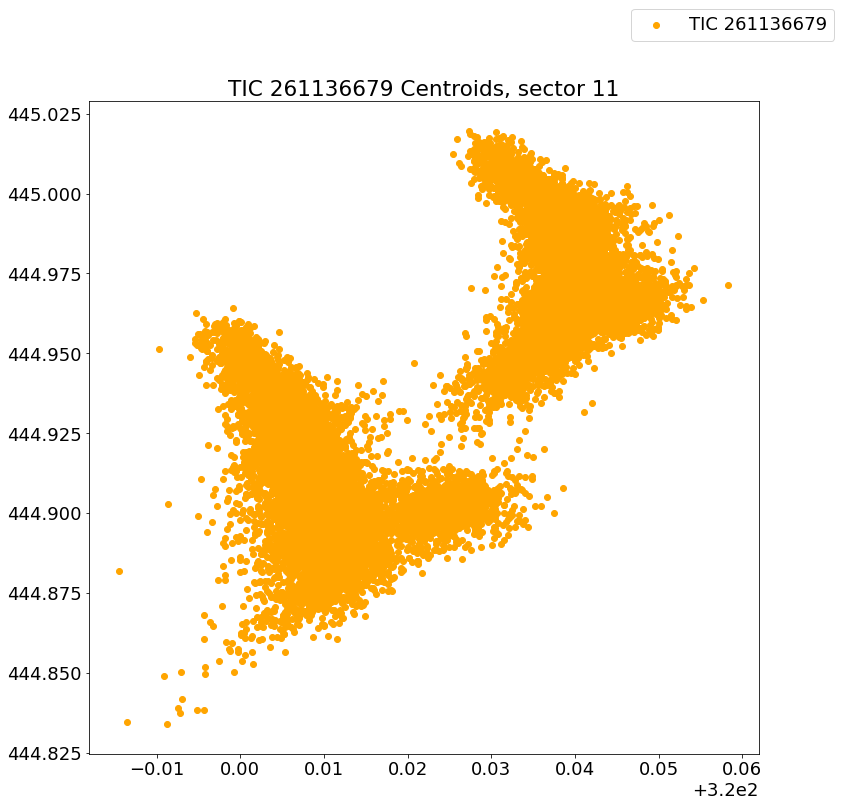

In [11]:
# Compare centrioid results between sector with obvious result (13) with sector with less obvious (8)
# SFFCorrector relies on centroid, show centroid

# sector 13 centroids are highly concentrated, likely from the single star
tplt.scatter_centroids(of_sector(lcf_coll, 13))

# # sector 8 centroids more scattered, though in a clear pattern
tplt.scatter_centroids(of_sector(lcf_coll, 8), c='green')

# # sector 11 centroids in between (it looks like sector 13 but are more scatterd. notice the scale in y-axis)
tplt.scatter_centroids(of_sector(lcf_coll, 11), c='orange')

print('Centroids')

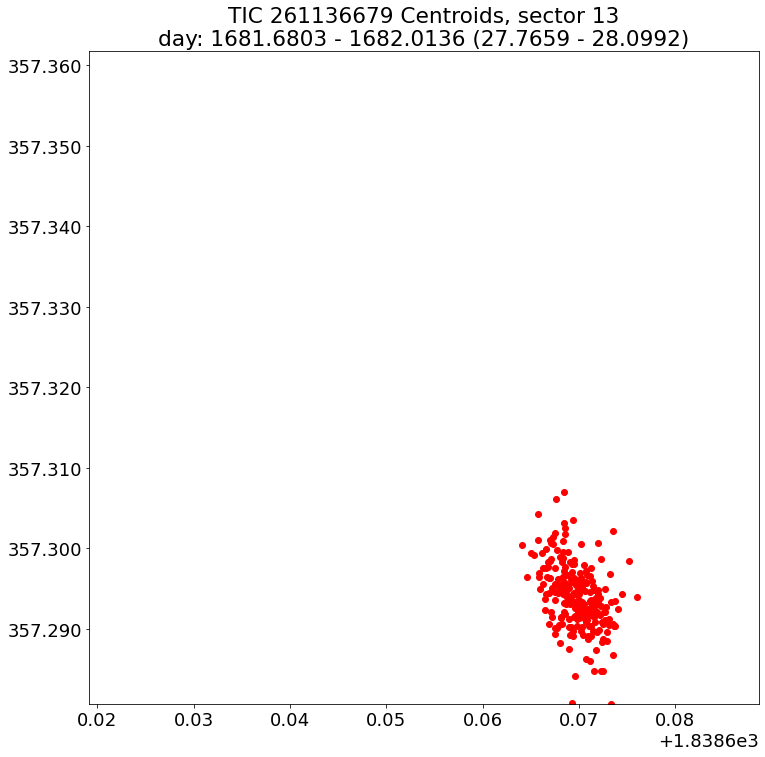

In [7]:
# import importlib
# importlib.reload(tplt)
# Or
# %load_ext autoreload
# %autoreload 2

# the animation shows that for sector 8, the centroids shift greatly arom time 1535 (the big anomaly in the lightcurve)
lcf = of_sector(lcf_coll, 13)
tplt.animate_centroids(lcf, num_obs_per_frame=240, c='red', use_relative_time=True, accumulative=False)


In [8]:
# len(lc08.centroid_row)
# np.nanmax(lc08.centroid_col)
num_o = 13452
num_steps = int(13452 / 120)
ary_n = np.linspace(1, num_o, num=num_steps, endpoint=False)
ary_n[0] = int(np.ceil(ary_n[1] /2))
ary_n = list(map(lambda n: int(n), ary_n))
ary_n

[61,
 121,
 241,
 361,
 481,
 601,
 721,
 841,
 961,
 1081,
 1201,
 1322,
 1442,
 1562,
 1682,
 1802,
 1922,
 2042,
 2162,
 2282,
 2402,
 2523,
 2643,
 2763,
 2883,
 3003,
 3123,
 3243,
 3363,
 3483,
 3603,
 3724,
 3844,
 3964,
 4084,
 4204,
 4324,
 4444,
 4564,
 4684,
 4804,
 4925,
 5045,
 5165,
 5285,
 5405,
 5525,
 5645,
 5765,
 5885,
 6005,
 6126,
 6246,
 6366,
 6486,
 6606,
 6726,
 6846,
 6966,
 7086,
 7206,
 7326,
 7447,
 7567,
 7687,
 7807,
 7927,
 8047,
 8167,
 8287,
 8407,
 8527,
 8648,
 8768,
 8888,
 9008,
 9128,
 9248,
 9368,
 9488,
 9608,
 9728,
 9849,
 9969,
 10089,
 10209,
 10329,
 10449,
 10569,
 10689,
 10809,
 10929,
 11050,
 11170,
 11290,
 11410,
 11530,
 11650,
 11770,
 11890,
 12010,
 12130,
 12251,
 12371,
 12491,
 12611,
 12731,
 12851,
 12971,
 13091,
 13211,
 13331]

In [9]:
print(list(map(lambda lc: lc.get_header()['SECTOR'], lcf_coll)))
print(list(map(lambda lc: lc.get_header()['CAMERA'], lcf_coll)))
print(list(map(lambda lc: lc.get_header()['DATE-OBS'], lcf_coll)))


[1, 4, 8, 11, 12, 13]
[4, 4, 4, 4, 3, 3]
['2018-07-25T19:01:42.709Z', '2018-10-19T09:35:40.521Z', '2019-02-02T20:09:35.998Z', '2019-04-23T06:29:33.130Z', '2019-05-21T10:45:32.097Z', '2019-06-19T09:55:31.020Z']


In [10]:
# combine all the observations together
# or I can just use lcf_coll.stich()
lc = None
for i in range(0, len(lcf_coll)):
    lc_cur = lcf_coll[i].get_lightcurve('PDCSAP_FLUX')
    if lc == None:
        lc = lc_cur    
    else:
        lc.append(lc_cur, inplace=True)
    
print(len(lc.time))

for i in range(0, len(lcf_coll)):
    lc_cur = lcf_coll[i].get_lightcurve('PDCSAP_FLUX')
    print(f"  Sector {lcf_coll[i].get_header()['SECTOR']}: {lc_cur.time.min()} - {lc_cur.time.max()}")

print(lc.time.max()  - lc.time.min())

# sector 13 data only, more obvious, sectors 12 and 1 less so but it still gets good result (period ~6.2 days).
# 4, 8, and 11 are quite off
lc = of_sector(lcf_coll, 4).PDCSAP_FLUX
# use the interactive transit period detection
#   caveat: un-sure if combining observations over time make sense for the algorithm
lc.interact_bls()


104572
  Sector 1: 1325.2969832846081 - 1353.1770887053747
  Sector 4: 1410.9021423486195 - 1436.8488570330412
  Sector 8: 1517.3459905681957 - 1541.999225928776
  Sector 11: 1596.7782453333475 - 1623.8926084826935
  Sector 12: 1624.9565034577033 - 1652.8928415938433
  Sector 13: 1653.9220076417546 - 1682.3580240458518
357.0610407612437
